# Training a Multilayer Neural Network for Image Classification

First, let's import the necessary packages

In [232]:
import sys, os
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [233]:
# Ignore useless warnings 
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

The MNIST dataset is a set of images of handwritten digits 0-9, with the associated target classes also numbered as 0-9. 

In [234]:
digits_mnist = keras.datasets.mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

Let's look at the shape and data of the training set

In [235]:
X_train_full.shape

(60000, 28, 28)

In [236]:
X_train_full.dtype

dtype('uint8')

Instead of eventually doing cross validation on the training set, let's further break the training set into a training set and a validation set, as this is more reliable, if we have the data to do it. Let's also scale the intensities of each pixel to be in the range 0-1.


In [237]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Let's look at the first image in the training set:

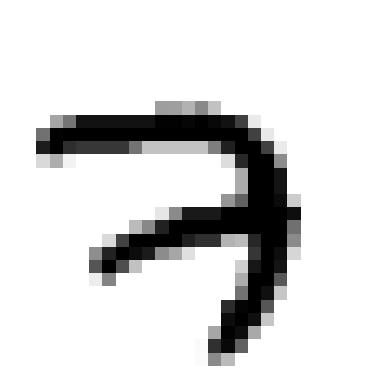

In [238]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are numbers that correspond to the class names

In [239]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

Here are the corresponding class names:

In [240]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]
class_names[y_train[0]]

'7'

Let's look at the sizes for our train, validation and test sets:

In [241]:
X_train.shape

(55000, 28, 28)

In [242]:
X_valid.shape

(5000, 28, 28)

In [243]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

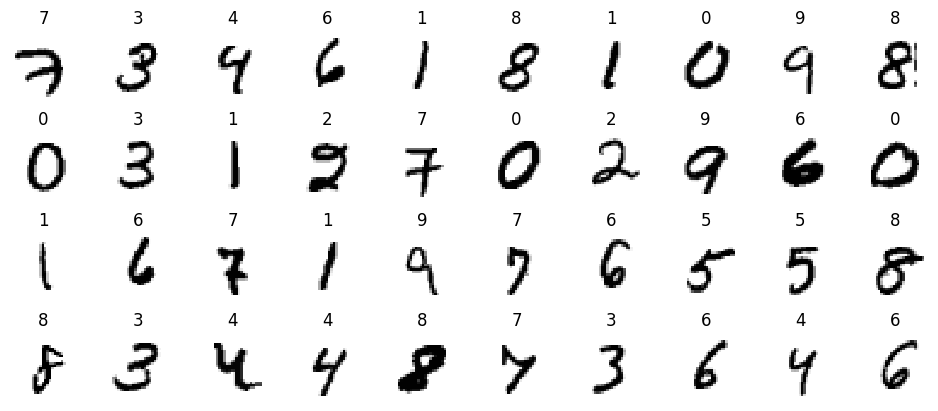

In [244]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

<!--Let's build a neural network with <b>five</b> hidden layers. Let's setup our random seeds for reproducibility-->
Let's build a neural network with <b>two</b> hidden layers. Let's setup our random seeds for reproducibility

In [245]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

Let's use the simplest sequential model. 
* We build our input layer that flattens the images into a 1D array.

* First, we add a dense hidden layer with 200 neurons; it manages its own weight matrix and bias terms, and uses the ReLU activation function.

* Next, we add a second hidden layer with 60 neurons and the ReLU activation function.

<!--
* Next, we add a second hidden layer with 100 neurons and the ReLU activation function.
* Then we add a third hidden layer with 35 neurons and the ReLU activation function.
-->

* Finally, we add the output layer with 10 neurons (for the 10 output classes). Since we must choose one of those 10 classes, we use the softmax activation function, rather than the sigmoid activation function. Softmax can handle the multinomial classification problem. 

In [246]:

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(60, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# View a summary of the newly created model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 60)                12060     
                                                                 
 dense_2 (Dense)             (None, 10)                610       
                                                                 
Total params: 169,670
Trainable params: 169,670
Non-trainable params: 0
_________________________________________________________________


Here is a more visually repersentative depiction of the model:

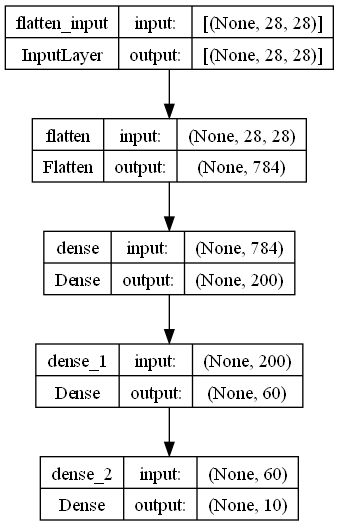

In [247]:
keras.utils.plot_model(model, "my_digit_mnist_model.png",show_shapes=True)

You can access the model's layers and individual layers as below. 

In [248]:
model.layers


Not of significant importance, but notice how our count of layers is accessible.  It's convenient!

In [249]:
hidden1 = model.layers[1]
hidden1.output

<KerasTensor: shape=(None, 200) dtype=float32 (created by layer 'dense')>

In [250]:
model.get_layer(hidden1.name) is hidden1

True

You can also see the parameters for a particular layer

In [251]:
weights, biases = hidden1.get_weights()
weights

array([[-0.01851845,  0.01272552, -0.04902041, ...,  0.07806545,
        -0.04265026,  0.00783493],
       [ 0.05053577, -0.00367057, -0.05262926, ...,  0.04766788,
        -0.03001637,  0.06824224],
       [ 0.0334091 , -0.06569967,  0.06033589, ...,  0.07363547,
         0.02795062, -0.05936848],
       ...,
       [ 0.01717122, -0.06156772,  0.01177513, ..., -0.0023483 ,
        -0.05166026,  0.07705317],
       [-0.0649569 ,  0.01544027,  0.06808986, ...,  0.03681614,
         0.03016177,  0.07626936],
       [-0.06374875, -0.02555561,  0.00444193, ...,  0.0023308 ,
        -0.02404029,  0.0676064 ]], dtype=float32)

In [252]:
weights.shape

(784, 200)

In [253]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [254]:
biases.shape

(200,)

After a model is created, you must call its compile() method to specify the loss function and optimizer to use. You can also optionally specify extra metrics to compute during training and evaluation. For more information, check out the<code>keras</code>documentation: https://keras.io/api/models/
To start out, we'll use a stochastic gradient descent model.

<h2>Critical points:</h2>
*  We use "sparse_categorical_crossentropy" because we have sparse labels.  </br>
   That is, for each instance examined, there is a target class index from 0-9.* </br>
* We will train the model using simple stochastic gradient descent  with a learning rate of 0.01 and momentum of 0. There are multiple parameters you can specify here.

\* Since this is a classifier, it's useful to measure the accuracy during training and evaluation<br/>
<p><b>*</b> Were we performing <i>binary</i> classification: 
<ul>
    <ol>
    <li>
        <b>Activation Function:</b> Sigmoid returns 0 or 1, so sigmoid would outperform softmax </li>
    <li>
        <b>Classification:</b> we'd use a <code>binary_crossentropy</code></li>     
    </ol>
</ul>
</p>

In [255]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.01,momentum=0.0),
              metrics=["accuracy"])

To train the model, we simply call the fit function. 
* We specify the epochs, and we provide our validation set. Since we have this validation set, we will not use cross validation. The training reports a training and validation loss and accuracy.
* fit() defaults to a batch_size of 32 This means that 32 sampled instances are used per epoch, and not the full training set. While it is the default value, it's important to note that it's been found that using the full training set can lead to suboptimal model generation. If a larger value is desired, stick to powers of 2.

In [256]:
history = model.fit(X_train, y_train, epochs=20,batch_size=32, 
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6312 - accuracy: 0.8315 - val_loss: 0.3081 - val_accuracy: 0.9156
Epoch 2/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2897 - accuracy: 0.9173 - val_loss: 0.2422 - val_accuracy: 0.9314
Epoch 3/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2370 - accuracy: 0.9330 - val_loss: 0.2007 - val_accuracy: 0.9428
Epoch 4/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2024 - accuracy: 0.9425 - val_loss: 0.1779 - val_accuracy: 0.9496
Epoch 5/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1771 - accuracy: 0.9493 - val_loss: 0.1587 - val_accuracy: 0.9558
Epoch 6/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1574 - accuracy: 0.9549 - val_loss: 0.1451 - val_accuracy: 0.9588
Epoch 7/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1416 - accuracy: 0.9595 - val_loss: 0.1320 - val_accuracy:

The fit() method returns a history object that contains the training parameters, list of epochs it went through, and a dictionary containing the loss and extra metrics measured at the end of each epoch. 

In [257]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 1719}

In [258]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [259]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

You can use this data to plot the bias-variance curve. You can see that we have still not overfit the model, so we could probably keep training for more epochs.
The validation set loss plot serves as our Test data line in the graph in the Performance Evaluation lecture, while the training set loss plot serves as the CV line in our graph in lecture

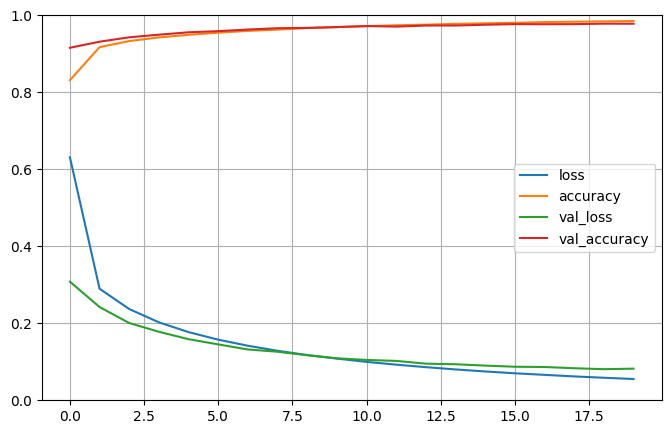

In [260]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Now that we've achieved >95% accuracy, it's time to interpret the model's performance.

To do so, we'll evaluate it on the test set to estimate the generalization error using the evaluate() method

In [261]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0871 - accuracy: 0.9727


[0.0871354416012764, 0.9726999998092651]

To employ **transfer learning, we can re-use the layer that we trained from the MNIST.  I realized this would be necessary once I tried trainning from my raw data and was getting very sensitive variance.

In [262]:
hidden1.trainable = False;

Next, use the predict() method to make predictions. Since we don't have new instances, let's just use the first 3 instances of the test set.

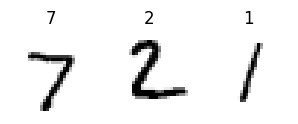

In [263]:
n_rows = 1
n_cols = 3
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [264]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(5)

1/1 [==============================] - 0s 108ms/step


array([[0.     , 0.     , 0.00007, 0.00047, 0.     , 0.     , 0.     ,
        0.99944, 0.     , 0.00001],
       [0.00002, 0.00006, 0.99795, 0.0018 , 0.     , 0.00001, 0.00008,
        0.     , 0.00008, 0.     ],
       [0.00005, 0.99198, 0.0009 , 0.00024, 0.00024, 0.00057, 0.00014,
        0.0034 , 0.00241, 0.00007]], dtype=float32)

As you can see above, there are three vecors in the array; each one corresponding to a sample in the subset.  Each vector is the resulting probabalistic predictions that the model estimates  for each class from 0 to 9. 

So to translate the array above to layman's:
* [1] is class 7 (number 7) with 100% probability class 7 (sneaker) with 3% probability. 
* [2] is class 2 (number 2) with 100% probability 
* [3] is class 1 (number 1) with 0.99% probability 

If you only care about the class with the highest estimated probability (even if that probability is quite low), then you can use the predict() method instead

In [265]:
y_pred = model.predict(X_new)
# Disable Scientific Notation for easy reading
np.set_printoptions(suppress=True)
print(np.expand_dims(y_pred, axis=1)) 

1/1 [==============================] - 0s 18ms/step
[[[0.00000085 0.00000139 0.00006979 0.00047365 0.00000005 0.00000073
   0.         0.9994413  0.00000079 0.00001148]]

 [[0.00002494 0.00005605 0.997948   0.00180218 0.         0.00000802
   0.00007802 0.         0.00008278 0.        ]]

 [[0.00005104 0.99198383 0.00090055 0.00024041 0.00023611 0.00056781
   0.00014341 0.00340326 0.00240833 0.0000653 ]]]


In [266]:
pred = np.argmax(y_pred,axis=1)
np.array(class_names)[pred]

array(['7', '2', '1'], dtype='<U1')

Here the classifier classified all three images correctly.

In [267]:
y_new = y_test[:3]
y_new

array([7, 2, 1], dtype=uint8)

And we can see the actual images too

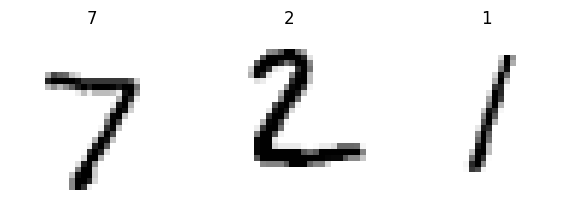

In [268]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [269]:
pretrained_output_shape = hidden1.output_shape[1:]
#plt.show(pretrained_output_shape)

Build and Save the model so we can use it for training future models.

In [270]:
model.build(X_new)
#model.summary()

In [271]:
import joblib
#save a model
#joblib.dump(model, "relu_mnist.pkl") 

model.save("mnist_model.h5")

#load a saved model
#forest_reg = joblib.load("relu_mnist.pkl") 

# Custom Dataset: Dysgraphia charset
I suffer from a clinical case of bad handwriting.  Courtesy of my university's Accessibility Center, I've got a nifty smart-pen that's able to record my handwriting.

I figured this was a great opportunity to perform some analysis with, so I got to writing a total of 144 digits (12 of each digit). This would make for a great test set, since it's data nobody's seen before.  I've decided to go with a Genetic Algorithm and a Convoluted Neural Network: the GA seems to me like it would be free of human bias, and courtesy of the random mutation, there would be a variety of tweaks performed to the images that ought to examine the various performance measures of the model more thoroughly.

### Be sure to mention that we're going to use decaying weights and some normalization

<i>The page prior to the pre-processing steps performed externally is pictured below</i>

To examine the images, we'll use the Pillow library to help us achieve this by converting the image into an 8-bit array (since RGB is 8-bit each color)

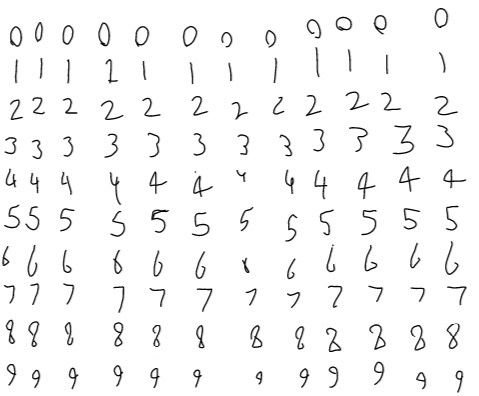

In [272]:
from PIL import Image, ImageOps

Image.open('dysgraph_master.png')

## Further pre-processing

In order to help manage any discrepencies created by my writing, we'll normalize the text per the MNIST tutorial:
<p><i>All images are size normalized to fit in a 20x20 pixel box and there are centered in a 28x28 image using the center of mass.</i></p>

Here, we've produced some functions to perform this size-normalization process using the <code>ndimage</code> library:

In [273]:
#from  import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_gen = ImageDataGenerator(rescale=1./255)

custom_dataset = data_gen.flow_from_directory(
    'custom_data/',
    target_size=(28, 28),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=16,
    shuffle=True)

Found 0 images belonging to 0 classes.


In [277]:
X_custom, Y_custom  = [],[]

# loop through each image file in the directory
for filename in os.listdir('custom_data'):
    # read in the image and convert to grayscale
    img = Image.open(os.path.join('custom_data', filename)).convert('L')

    # threshold the image to create a binary mask
    img = img.point(lambda x: 0 if x < 120 else 255, '1')

    # find the center of mass
    x, y = np.array(img).nonzero()
    x_mean = int(np.mean(x))
    y_mean = int(np.mean(y))

    # crop image to a bounding box around the center of mass
    bbox = (y_mean-14, x_mean-14, y_mean+14, x_mean+14)
    img = img.crop(bbox)

    # resize to fit inside 20x20 box
    img = img.resize((20, 20))

    # pad the image with zeros to create a 28x28 array
    img = ImageOps.expand(img, border=(4, 4, 4, 4), fill=0)

    # convert the image to a numpy array and append to the list
    img_array = np.array(img).reshape((28, 28, 1))
    X_custom.append(img_array)

    # Don't forget the Y-label at the end of the filename!
    # extract the label from the filename
    label = int(filename.split("_")[1])
    # append the label to the list
    Y_custom.append(label)
    
# convert the list to a numpy array
X_custom = np.array(X_custom)
Y_custom = np.array(Y_custom)


In [278]:
print("X_Custom shape:", X_custom.shape)
print("Y_Custom shape:", Y_custom.shape)

X_Custom shape: (326, 28, 28, 1)
Y_Custom shape: (326,)


As you can see, we need to OHE the Y_Custom array.

In [279]:
from keras.utils import to_categorical

# Load the data and perform necessary preprocessing...

# Perform one-hot encoding on the labels
Y_custom_encoded = to_categorical(Y_custom, num_classes=10)


In [280]:
print(Y_custom[:3])
print(Y_custom_encoded[:3])

[0 0 0]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Viewing the new set
#### Now that we've pre-processed our data, lets examine some a small subset of our test set. 

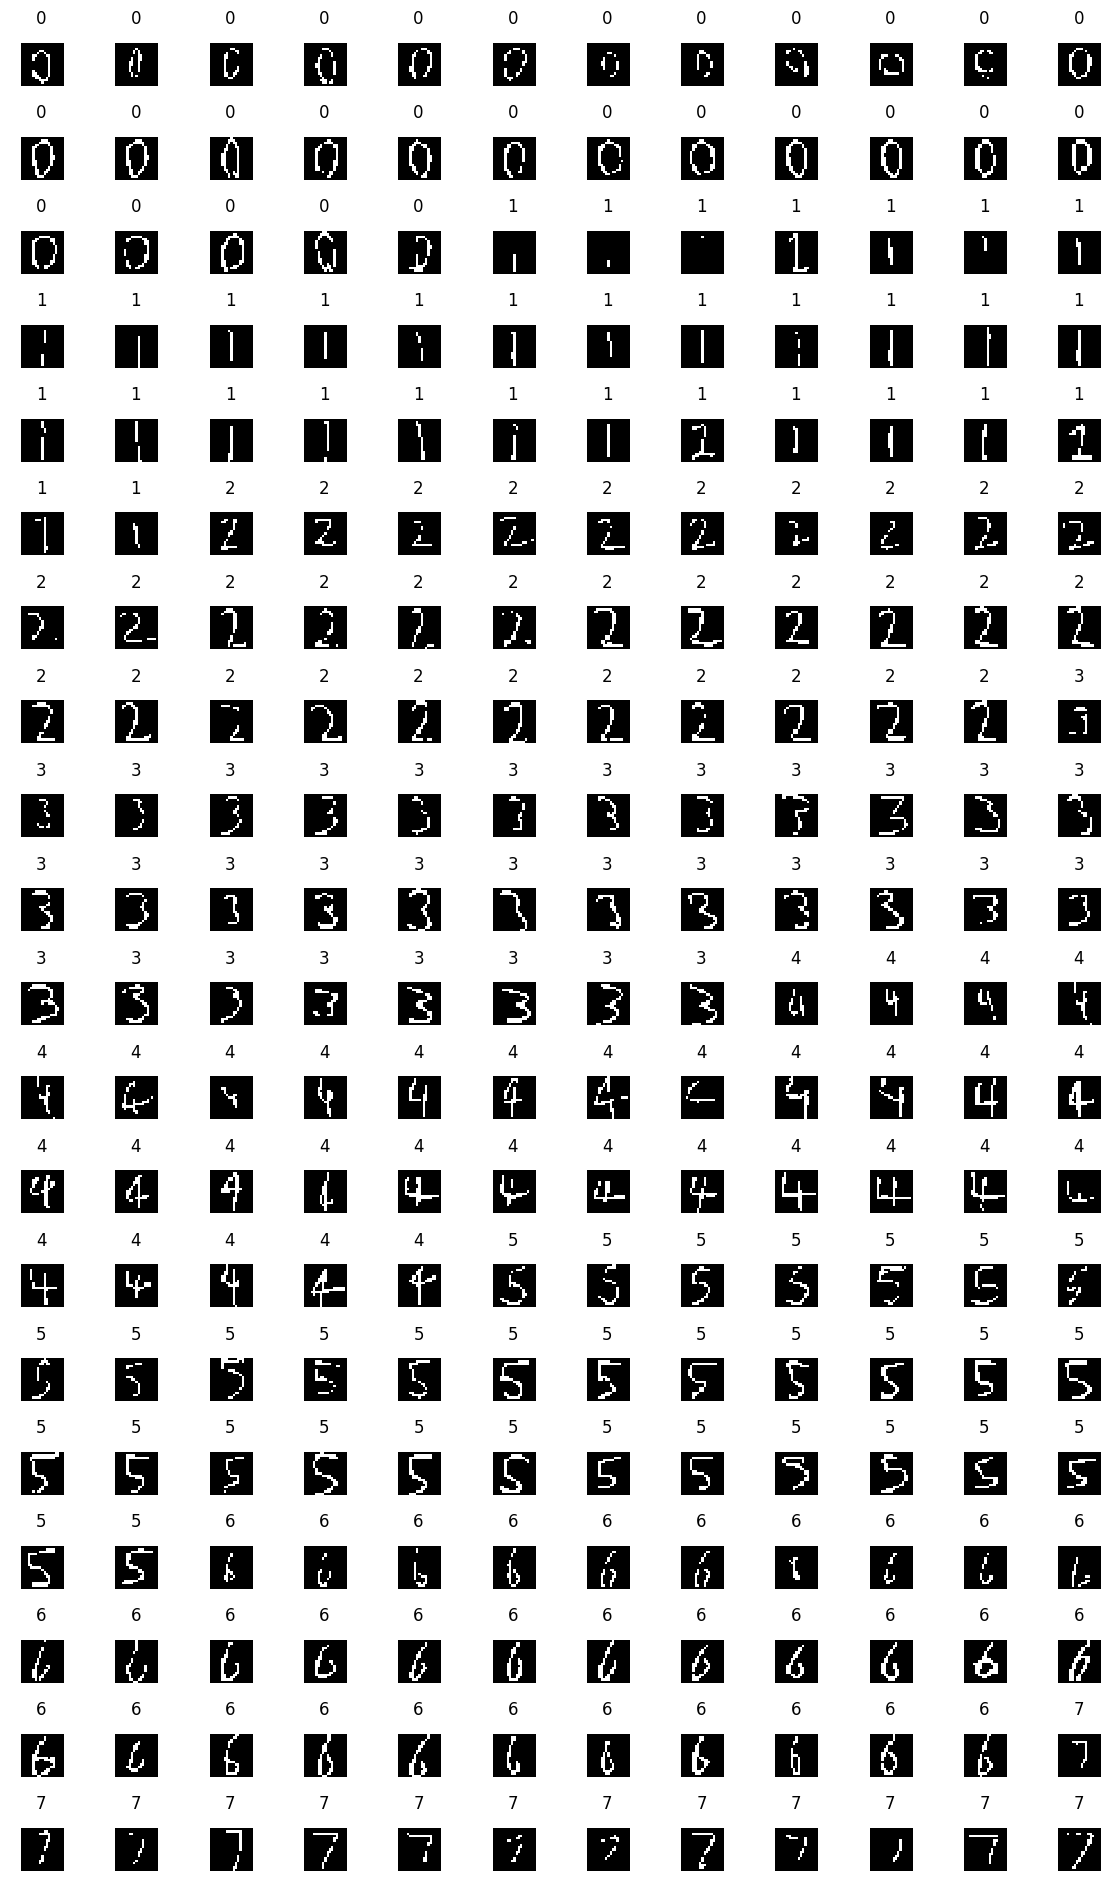

In [281]:
n_rows = 20
n_cols = 12
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        img_ind = index % len(X_custom)
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_custom[img_ind], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(Y_custom[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Splitting the dataset:

Since our images are already scaled to the 28x28 size, we can go ahead and divide our data.  Since we have a comparatively tiny sample size this time (N = 330), we'll use use k-fold cross validation.

In [352]:
from sklearn.model_selection import train_test_split
X_cust_train, X_cust_test = train_test_split(X_custom, test_size=0.2, random_state=42)

Y_cust_train_enc, Y_cust_test_enc = train_test_split(Y_custom_encoded, test_size=0.2, random_state=42)
Y_cust_train, Y_cust_test = train_test_split(Y_custom, test_size=0.2, random_state=42)

X_cust_valid, X_cust_train = X_cust_train[:165], X_cust_train[165:] 
Y_cust_valid, Y_cust_train = Y_cust_train[:165], Y_cust_train[165:]

print("X_cust_train:", X_cust_train.shape)
print("Y_cust_train:", Y_cust_train.shape)

X_cust_train: (95, 28, 28, 1)
Y_cust_train: (95,)


### K-Fold Cross Validation:

We will use `tensorflow.keras` with **two** dense layers. Then, we compile the model via the *Adam* optimzer. This combines the AdaGrad and RMSProp, which is advantageous in situations where there's a lot of potential variance in the feature importance, and thus attempts to employ ***adaptive learning rates***.  This allows the learning rates to base itself on ther average of previous gradients to aid in convergence.

##### Loss Function
As the nature of our classification problem has gone unchanged, we will continue employing `sparse_categorical_crossentropy` for the loss function.  This is applicable when we have labels that are able to be represented as integers.  Since we're classifying *digits*, 0-9 is a range of *integers* so we've got all we need to make this a great justification.  

Under the hood, the cross-entropy calculates loss between predicted probabilities and the *true* labels.  What's impressive is that it does all this *without One-Hot Encoding.*

(I really didn't want to get into LaTeX, so I had a little help from Bard to nail down the syntax to get it to display in the notebook:)
$$\text{Loss} = -\sum_{i=1}^{C} y_i \log(p_i)$$
Where:
- (C) is the number of classes.
- (y<sub>i</sub>) is the true label for class (i) (0 or 1)
- (p<sub>i</sub>) is the predicted probability for class (i)


We'll need to define a validation set:

In [353]:
from keras.layers import Input
model = keras.models.load_model('mnist_model.h5')

model.trainable = False;
#model = model(X_train, y_train)
#refined_model = keras.models.Sequential()
shape_in = X_cust_train.shape #[1:]

#X_cust_train_flattened = X_cust_train.reshape(X_cust_train.shape[0], -1)
X_cust_train_flattened = np.reshape(X_cust_train, (X_cust_train.shape[0], 28,28,1))

refined_model = keras.models.Sequential([
    #Input(shape=shape_in),
    keras.layers.Flatten(input_shape=(28,28,1)),
    hidden1,
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

# refined_model = keras.models.Sequential([
#         keras.layers.Flatten(),
#         keras.layers.Dense(280, activation='relu'),
#         keras.layers.Dense(50, activation='relu'),
#         keras.layers.Dense(10, activation='softmax')
#     ])

Above, we've re-used the trained hidden layer from the first model trained on the MNIST set to be used on a new model that we'll run against this set. 

In [ ]:
#X_cust_train_flattened
refined_model.fit(X_cust_train_flattened, Y_cust_train_enc, epochs = 90, batch_size = 32)
#refined_model.fit(X_cust_train, Y_cust_train, epochs = 30, batch_size = 16)

Now, we'll apply the K-fold cross validation with our model:

In [360]:
print(len(kf.split(X_cust_train))

TypeError: object of type 'generator' has no len()

In [357]:

# Since we've got a small set, lets use 10 folds.
K = 10

losses = []
accuracies = []

kf = KFold(n_splits=K)

for train_i, val_i in kf.split(X_cust_train):

    X_cust_train, X_cust_val = X_cust_train[train_i], X_cust_train[val_i]
    Y_cust_train, Y_cust_val = Y_cust_train[train_i], Y_cust_train[val_i]

    #training it on the custom data
    refined_model.compile(
        loss=keras.losses.CategoricalCrossentropy(from_logits=False), 
        #loss=keras.losses.BinaryCrossentropy(from_logtis=True),
        optimizer=keras.optimizers.Adam(
            learning_rate=0.004,
            beta_1=0.92,
            beta_2=0.9995,
            weight_decay=0.025,
        ),
        metrics=["accuracy"])
  
    loss, accuracy = model.evaluate(X_cust_val,Y_cust_val, verbose=0)

    #refined_model.build(X_test)

# Calculate the average performance across all folds
avg_loss = np.mean(losses)
avg_accuracy = np.mean(accuracies)

#refined_model.summary()
print('Average Loss:', avg_loss)
print('Average Accuracy:', avg_accuracy)

IndexError: index 76 is out of bounds for axis 0 with size 76

In [346]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 60)                12060     
                                                                 
 dense_2 (Dense)             (None, 10)                610       
                                                                 
Total params: 169,670
Trainable params: 0
Non-trainable params: 169,670
_________________________________________________________________


In [347]:
refined_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense (Dense)               multiple                  157000    
                                                                 
 dense_67 (Dense)            (None, 150)               30150     
                                                                 
 dense_68 (Dense)            (None, 40)                6040      
                                                                 
 dense_69 (Dense)            (None, 20)                820       
                                                                 
 dense_70 (Dense)            (None, 10)                210       
                                                                 
Total params: 194,220
Trainable params: 37,220
Non-tr

In [325]:
print(X_cust_test.shape)
for layer in refined_model.layers:
    print(layer.trainable)
#len(Y_cust_train))

layer = refined_model.layers3

(66, 28, 28, 1)
True
False
True
True
True
True


AttributeError: 'Sequential' object has no attribute 'layers3'

In [311]:
#history = model.fit(X_cust_train, Y_cust_train, epochs=70, batch_size=32)#, validation_data=(X_cust_test, Y_cust_test))
model.evaluate(X_cust_test, Y_cust_test)

3/3 [==============================] - 0s 2ms/step - loss: 3545.3276 - accuracy: 0.0455


[3545.32763671875, 0.04545454680919647]

Of note, is that the use of the `KerasClassifer` requires reconfiguring our model to be returned out of a funtion so that it can be passed via function as another parameter.

In [129]:
print(reifned_)

[]


In [90]:
from scikeras.wrappers import KerasClassifier 
#from tf.keras.models import Dense, Sequential
from tensorflow import keras
from tensorflow.keras import layers

def create_model():

    model = keras.models.Sequential([
        keras.layers.Input(shape=28,28,1))
        pretrained_layer,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(280, activation='relu'),
        tf.keras.layers.Dense(50, activation='relu'),
        # As before, we have a layer of 10 since we have 10 digit classes
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.layers[1].build(pretrained_output_shape)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' on line 8 (3857823890.py, line 9)

In [159]:
# from sklearn.model_selection import cross_val_score, KFold

# # Here's the meat of our validation on the small data set:
# k = 5
# kf = KFold(n_splits=k, random_state=42, shuffle=True)
# model = KerasClassifier(build_fn=create_model, epochs = 20, batch_size=32, use_target_transformer=False)
# scores = cross_val_score(model, X_cust_train, Y_cust_train, cv=kf)

# print("Cross-validation scores:", scores)
# print("Mean accuracy:", scores.mean())
from sklearn.model_selection import KFold
import numpy as np

k = 5
kf = KFold(n_splits=k, random_state=42, shuffle=True)

model = create_model()
model.fit(X_cust_train, Y_cust_train, epochs=30, batch_size=32)
score = model.evaluate(X_cust_test, Y_cust_test)
scores.append(score[1])  # Appending the accuracy score

mean_accuracy = np.mean(scores)
print("Cross-validation scores:", scores)
print("Mean accuracy:", mean_accuracy)



NameError: name 'create_model' is not defined

In [158]:
print(X_cust_train.shape)
print(Y_cust_train.shape)

(110, 28, 28, 1)
(110, 10)


In [93]:
len(X_cust_train)

96

In [94]:
# Fit the model to the data
#
#history = model.fit(X_cust_train, Y_cust_train, epochs=10, validation_split=0.2)

In [96]:
from sklearn.model_selection import LeaveOneOut

# Define the model architecture
model = Sequential[(
    tf.keraslayers.Dense(280, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
)]
model.add(Dense(64, activation='relu', input_shape=(28, 28, 1)))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Perform leave-one-out cross-validation
loo = LeaveOneOut()
scores = cross_val_score(model, X_cust_train, y_cust_train, cv=loo)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


NameError: name 'Sequential' is not defined

In [ ]:
plt.show(X_custom

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<h1>Changing up the model</h1>
Not bad.  Let's delve into some more applied hyperparameters for our network.
Neural networks take
<h3>Optimizer</h3>

<h3>Loss function</h3>


In [ ]:
print(gray)